# 6.2 Exploring relationships

1. Importing Visualization Libraries and Data

2. Exploring Relationships

 Correlations
 
 Scatterplots
 
 Pair Plots
 
 Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import scipy

In [2]:
path = r'/Users/stadtsalat/Documents/Boat Sales'

In [3]:
# Importing the clean boat data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_clean.csv'))

In [4]:
# Checking the boat_data df
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Views last 7 days,Price_in_Euro,Country,City
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,226,3370,Switzerland,Lake Geneva
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt
2,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,64,3367,Denmark,Svendborg
3,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern
4,6,Catamaran,Unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3636,Switzerland,Neuenburgersee


In [5]:
matplotlib.__version__

'3.5.2'

### 3. Create a correlation matrix heatmap (colored).
### - Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [6]:
# Creating a correlation matrix 
df.corr()

,Unnamed: 0,Year Built,Length,Width,Views last 7 days,Price_in_Euro
Unnamed: 0,1.000000,-0.085353,-0.213607,-0.235232,0.080255,-0.128075
Year Built,-0.085353,1.000000,-0.204647,-0.105334,-0.113179,0.104647
Length,-0.213607,-0.204647,1.000000,0.868722,-0.138331,0.562079
Width,-0.235232,-0.105334,0.868722,1.000000,-0.163870,0.519516
Views last 7 days,0.080255,-0.113179,-0.138331,-0.163870,1.000000,-0.008153
Price_in_Euro,-0.128075,0.104647,0.562079,0.519516,-0.008153,1.000000


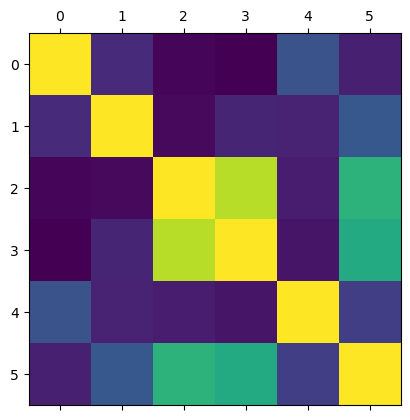

In [7]:
# Creating a correlation heatmap using matplotlib
plt.matshow(df.corr())
plt.show()

In [8]:
# Creating a smaller df with the columns we are interested in
df_small=df[['Year Built','Length','Width','Views last 7 days','Price_in_Euro']]

Text(0.5, 1.0, 'Correlation Matrix')

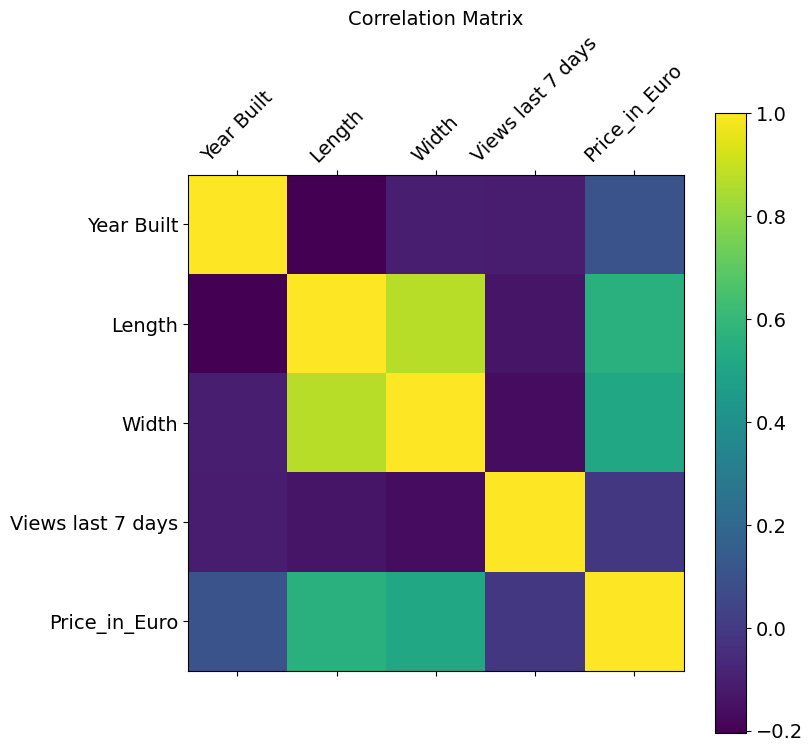

In [9]:
# Adding labels, a legend, and changing the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_small.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_small.shape[1]), df_small.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_small.shape[1]), df_small.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

By looking at the heatmap, the only obvious strong correlation is the one between the price and the size (width&length).


### 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
### - Discuss the output in a markdown cell.

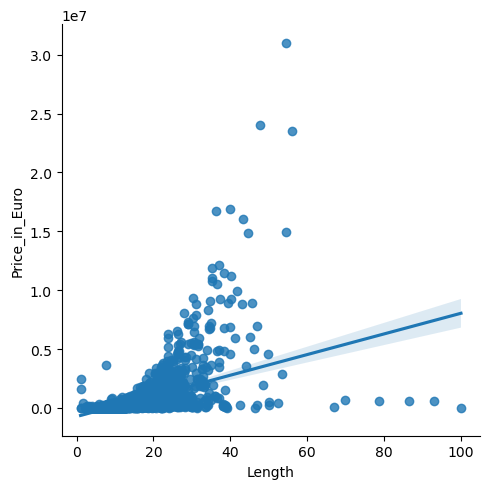

In [10]:
# Creating a scatterplot for the "length" and "Price in euro" columns in seaborn

sns.lmplot(x = 'Length', y = 'Price_in_Euro', data = df_small)

In [33]:
g.savefig("price vs Length.png") 

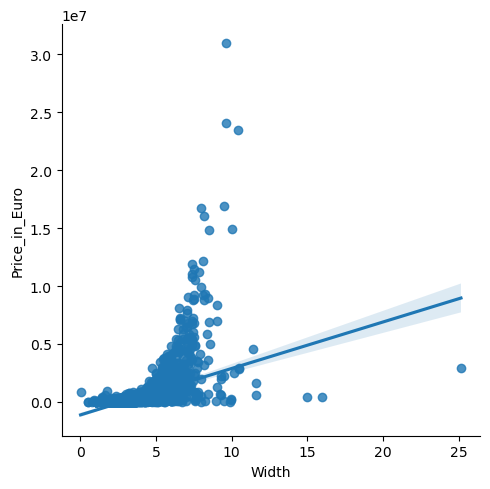

In [11]:
# Creating a scatterplot for the "width" and "Price in euro" columns in seaborn

sns.lmplot(x = 'Width', y = 'Price_in_Euro', data = df_small)

In [32]:
g.savefig("price vs width.png") 

In both scatter plots we see the same moderate posive correlation.We also notice a few outliers. The correlation is not as storng as expected

### 5.Create a pair plot of the entire data set.
### - Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

In [12]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Views last 7 days,Price_in_Euro,Country,City
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,226,3370,Switzerland,Lake Geneva
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt
2,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,64,3367,Denmark,Svendborg
3,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern
4,6,Catamaran,Unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3636,Switzerland,Neuenburgersee


In [13]:
# Creating a subset only with the columns we need
sub=df[['Year Built', 'Length', 'Width', 'Views last 7 days','Price_in_Euro']]

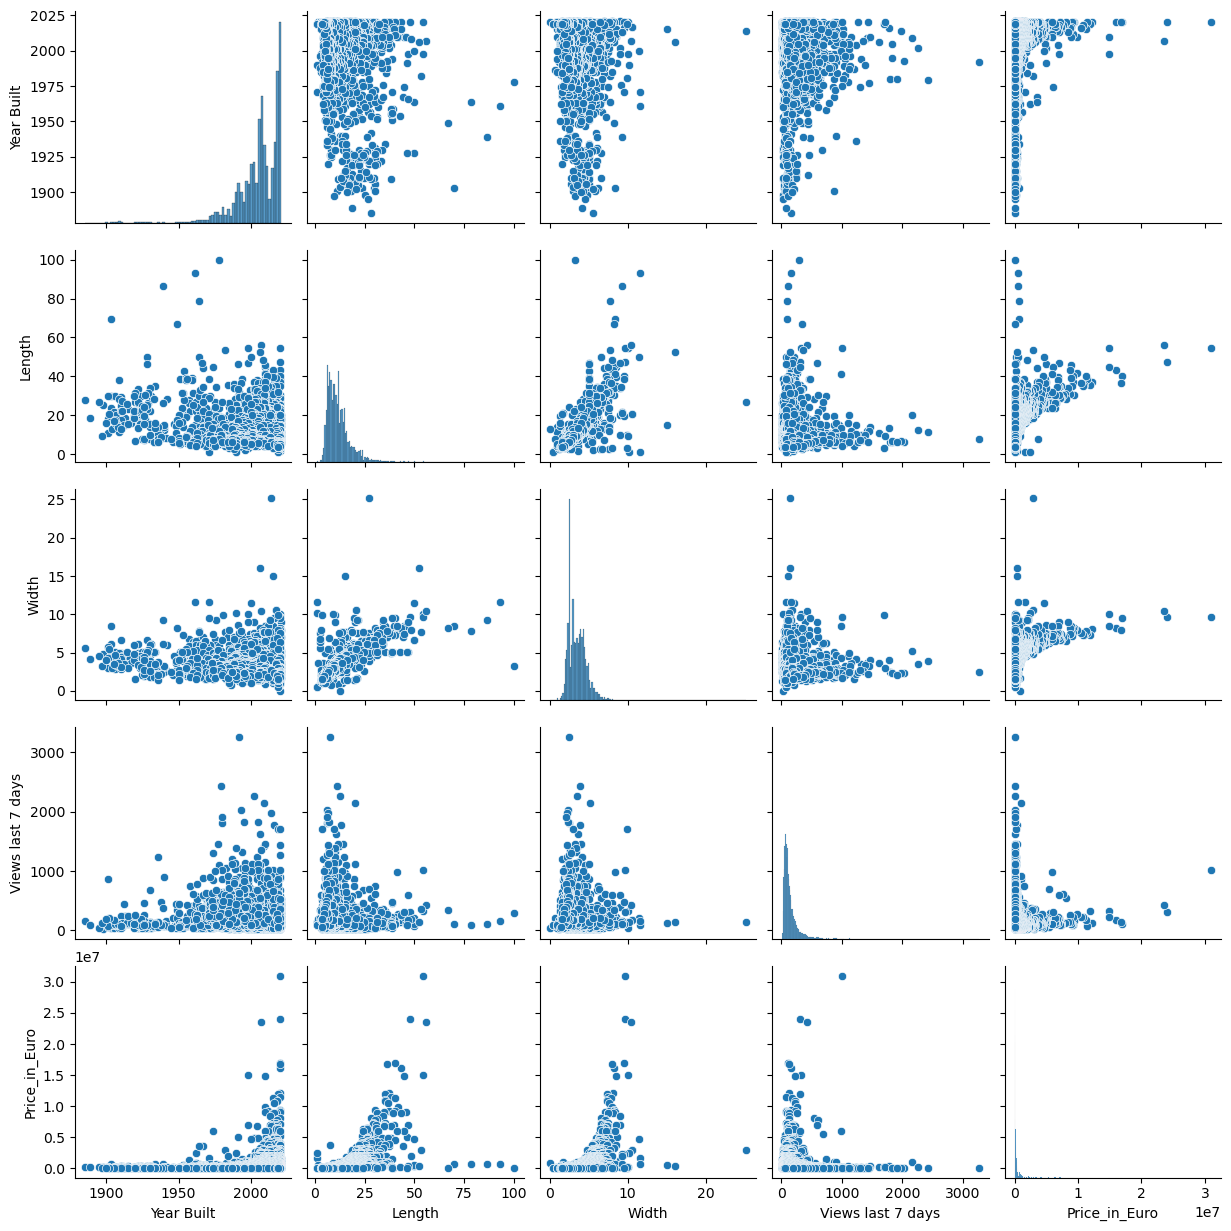

In [14]:
# Creating a pair plot 

g = sns.pairplot(sub)

In [31]:
g.savefig("pairplot.png") 

Some interesting correlations are between:
- Price and the Year built. The newer , the more expensive
- Views last 7 days and price. The more views, the cheaper the boat


### 6. Create a categorical plot and interpret the results.

<AxesSubplot:xlabel='Price_in_Euro', ylabel='Count'>

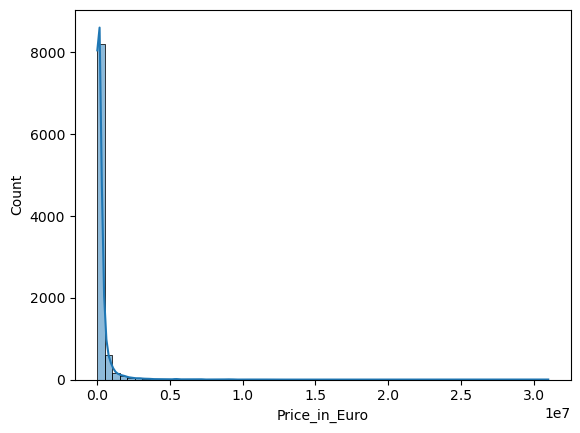

In [15]:
# Histogram to visualize the distribution of the variables. 
sns.histplot(df['Price_in_Euro'],bins=60,kde=True)

In [30]:
g.savefig("pice histogram.png") 

In [16]:
df.loc[df['Price_in_Euro'] <50000, 'Pricing Category'] = 'Low price'
df.loc[(df['Price_in_Euro'] >=50000) & (df['Price_in_Euro'] <=100000), 'Pricing Category'] = 'Mid Price'
df.loc[df['Price_in_Euro'] >100000, 'Pricing Category'] = 'High Price'

In [17]:
df['Pricing Category'].value_counts(dropna = False)

High Price    4398
Low price     2692
Mid Price     2151
Name: Pricing Category, dtype: int64

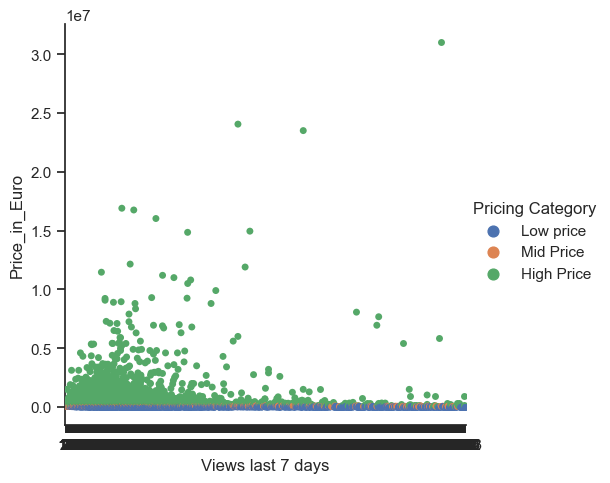

In [20]:
# Creating a categorical plot in seaborn using the price category created above
sns.set(style='ticks')
g = sns.catplot(x='Views last 7 days', y='Price_in_Euro', hue = 'Pricing Category', data = df)

In [29]:
g.savefig("Price.png") 

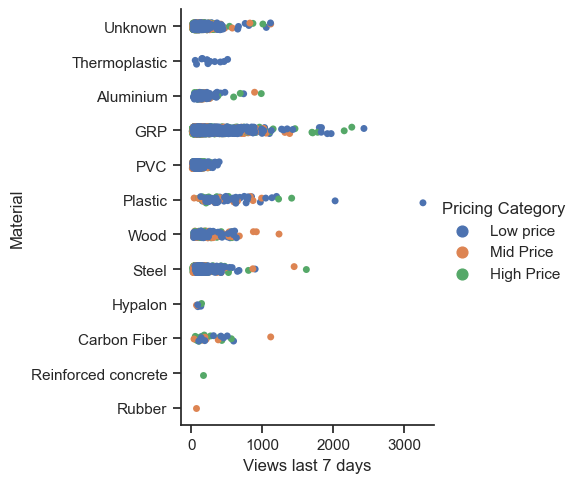

In [22]:
# Creating a categorical plot crossing the views with material
sns.set(style='ticks')
g = sns.catplot(x='Views last 7 days', y='Material', hue = 'Pricing Category', data = df)

In [28]:
g.savefig("MAterial.png") 

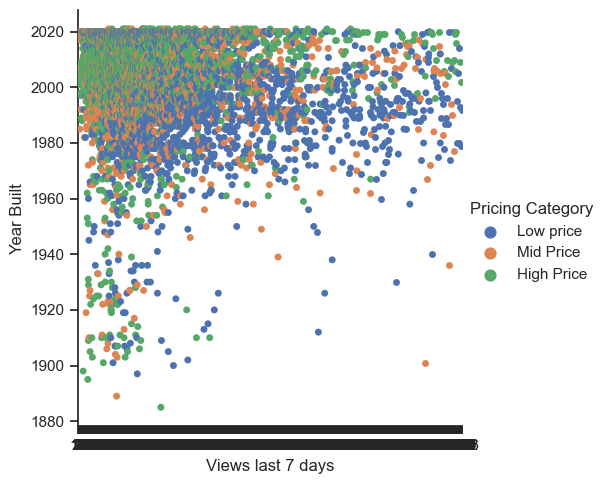

In [23]:
# Creating a categorical plot crossing the views with year built
sns.set(style='ticks')
g = sns.catplot(x='Views last 7 days', y='Year Built', hue = 'Pricing Category', data = df)

In [27]:
g.savefig("Year Built.png") 

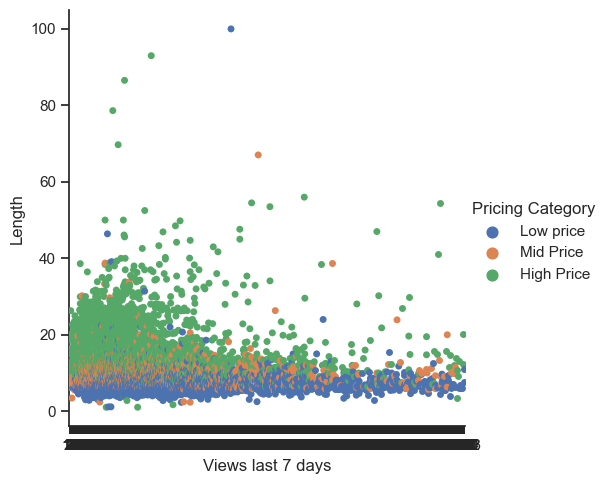

In [24]:
# Creating a categorical plot crossing the views with length
sns.set(style='ticks')
g = sns.catplot(x='Views last 7 days', y='Length', hue = 'Pricing Category', data = df)

In [26]:
g.savefig("Length.png") 

### 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

1. Characteristics of the most viewed boat listings in the last 7 days
- Material GRP
- Recently built boats
- Boats with small to average length 

2. Is it the most expensive boats that get the most views?
- It seems like the cheaper boats get the most views



### 8.Define any hypotheses that you can at this point. You’ll be testing these later on.

- Boats listed at a low price category are expected to attract higher web traffic and receive more views.

- Boats listed as being made of GRP are expected to garner higher web traffic and be viewed more frequently.

- Older boat models are expected to generate more web traffic and receive a higher number of views.



In [34]:
# Exporting the latest df
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_6_3.csv'))